# Investigation of Ford GoBike's trip data

# Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Read csv file
df = pd.read_csv('202002-baywheels-tripdata.csv')

C:\Users\Naveen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Gather data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN


In [4]:
#To check the columns 
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'rental_access_method'],
      dtype='object')

In [5]:
#Find unique Values
df.nunique()

duration_sec                 6769
start_time                 401435
end_time                   401305
start_station_id              436
start_station_name            436
start_station_latitude     191955
start_station_longitude    198391
end_station_id                435
end_station_name              435
end_station_latitude       192767
end_station_longitude      199380
bike_id                      8249
user_type                       2
rental_access_method            2
dtype: int64

In [6]:
#Find null values
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           270631
start_station_name         270631
start_station_latitude          0
start_station_longitude         0
end_station_id             270160
end_station_name           270160
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       114511
dtype: int64

# Data Issues

1.start_station_id, end_station_id and bike_id should be of string datatype<br>
2.start_station_id, start_station_name, end_station_id, end_station_name have some null values<br>
3.start_time and end_time should be of datetime format rather than strings<br>
4.Add columns for the difference in latitude and longitude

<font size ='5'><b>Cleaning Data</b><br>
    
    

Drop Null values

In [7]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [8]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,298,2020-02-01 20:14:08,2020-02-01 20:19:06,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,885034,Subscriber,app
1,393,2020-02-03 18:33:39,2020-02-03 18:40:12,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,470367,Subscriber,app
2,284,2020-02-16 19:45:10,2020-02-16 19:49:54,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,530223,Subscriber,app
3,296,2020-02-08 20:40:25,2020-02-08 20:45:22,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,814402,Subscriber,app
4,799,2020-02-04 11:43:38,2020-02-04 11:56:57,425.0,Bird Ave at Willow St,37.311284,-121.896325,425.0,Bird Ave at Willow St,37.311284,-121.896325,100235,Customer,app
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14511,1183,2020-02-21 17:10:57,2020-02-21 17:30:41,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,14.0,Clay St at Battery St,37.795001,-122.399970,500454,Customer,app
14512,383,2020-02-27 08:07:38,2020-02-27 08:14:01,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,988044,Subscriber,app
14513,269,2020-02-07 08:36:58,2020-02-07 08:41:28,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,16.0,Market St at Steuart St,37.794497,-122.394838,263995,Subscriber,clipper
14514,952,2020-02-25 09:23:41,2020-02-25 09:39:34,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,81.0,Berry St at 4th St,37.775880,-122.393170,412804,Subscriber,app


In [9]:
df.isna()
for _ in df.columns:
    print (_)
    print(sum(df[_].isna()), '\n')

duration_sec
0 

start_time
0 

end_time
0 

start_station_id
0 

start_station_name
0 

start_station_latitude
0 

start_station_longitude
0 

end_station_id
0 

end_station_name
0 

end_station_latitude
0 

end_station_longitude
0 

bike_id
0 

user_type
0 

rental_access_method
0 



In [10]:
#To change start_time and end_time to datetime format

df['start_station_id'] = df['start_station_id'].astype('int').astype('str')
df['end_station_id'] = df['end_station_id'].astype('float').astype('int').astype('str')

In [11]:
#Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14516 entries, 0 to 14515
Data columns (total 14 columns):
duration_sec               14516 non-null int64
start_time                 14516 non-null object
end_time                   14516 non-null object
start_station_id           14516 non-null object
start_station_name         14516 non-null object
start_station_latitude     14516 non-null float64
start_station_longitude    14516 non-null float64
end_station_id             14516 non-null object
end_station_name           14516 non-null object
end_station_latitude       14516 non-null float64
end_station_longitude      14516 non-null float64
bike_id                    14516 non-null int64
user_type                  14516 non-null object
rental_access_method       14516 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 1.6+ MB


In [12]:
#Start_time and end_time should be of datetime format 
df[['start_time', 'end_time']].head()

,start_time,end_time
0,2020-02-01 20:14:08,2020-02-01 20:19:06
1,2020-02-03 18:33:39,2020-02-03 18:40:12
2,2020-02-16 19:45:10,2020-02-16 19:49:54
3,2020-02-08 20:40:25,2020-02-08 20:45:22
4,2020-02-04 11:43:38,2020-02-04 11:56:57


In [13]:
#Format date
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [14]:
#Test
df[['start_time', 'end_time']].head()

,start_time,end_time
0,2020-02-01 20:14:08,2020-02-01 20:19:06
1,2020-02-03 18:33:39,2020-02-03 18:40:12
2,2020-02-16 19:45:10,2020-02-16 19:49:54
3,2020-02-08 20:40:25,2020-02-08 20:45:22
4,2020-02-04 11:43:38,2020-02-04 11:56:57


In [15]:
# Add 'duration' column

def minCount(dates):
    return (round((dates.seconds/60)))

def hourCount(dates):
    return (round((dates.seconds/60)/60, 2))

df['duration'] = df['end_time'] - df['start_time']

dates = df['duration'].abs()
dates = dates.map(minCount)
df['duration_min'] = dates

dates = df['duration'].abs()
dates = dates.map(hourCount)
df['duration_hour'] = dates

In [16]:
#Test
df.head()[['duration_sec', 'duration_min', 'duration_hour']]

,duration_sec,duration_min,duration_hour
0,298,5,0.08
1,393,7,0.11
2,284,5,0.08
3,296,5,0.08
4,799,13,0.22


In [17]:
#Add column for difference in latitude and longitude
df['latitude_diff'] = df['start_station_latitude'] - df['end_station_latitude']

df['longitude_diff'] = df['start_station_longitude'] - df['end_station_longitude']

In [18]:
#Test

df.head()[['latitude_diff', 'longitude_diff']]

,latitude_diff,longitude_diff
0,-0.010743,-0.007011
1,-0.010743,-0.007011
2,-0.010743,-0.007011
3,-0.010743,-0.007011
4,0.000000,0.000000


Check Duplicate values

In [19]:
# No of Duplicated values

for _ in df.columns:
    print(_,sum(df[_].duplicated()))

duration_sec 12445
start_time 87
end_time 113
start_station_id 14222
start_station_name 14222
start_station_latitude 14222
start_station_longitude 14222
end_station_id 14218
end_station_name 14218
end_station_latitude 14218
end_station_longitude 14218
bike_id 11791
user_type 14514
rental_access_method 14514
duration 12454
duration_min 14387
duration_hour 14330
latitude_diff 7745
longitude_diff 7753


In [20]:
# No of Unique values

uniques = ['user_type', 'rental_access_method']
for _ in uniques:
    print (_, '\t\t-', df[_].unique(), '\n')

user_type 		- ['Subscriber' 'Customer'] 

rental_access_method 		- ['app' 'clipper'] 



In [21]:
#Adding Month,Day and Hour

df['start_month'] = df['start_time'].dt.month_name()
df['start_day'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour


df['end_month'] = df['end_time'].dt.month_name()
df['end_day'] = df['end_time'].dt.day_name()
df['end_hour'] = df['end_time'].dt.hour

In [22]:
#Test
df.head()[['duration_sec', 'duration', 'start_month', 'start_day', 'start_hour', 'end_month', 'end_day', 'end_hour','rental_access_method']]

,duration_sec,duration,start_month,start_day,start_hour,end_month,end_day,end_hour,rental_access_method
0,298,00:04:58,February,Saturday,20,February,Saturday,20,app
1,393,00:06:33,February,Monday,18,February,Monday,18,app
2,284,00:04:44,February,Sunday,19,February,Sunday,19,app
3,296,00:04:57,February,Saturday,20,February,Saturday,20,app
4,799,00:13:19,February,Tuesday,11,February,Tuesday,11,app


In [23]:
#Removing Outliers
df = df[(df['latitude_diff']<1) & (df['latitude_diff']>-1)]

Conclusion<br>
Difference between latitude or longitude is greater than 1 (Not possible for road trip)

In [24]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'rental_access_method', 'duration', 'duration_min', 'duration_hour',
       'latitude_diff', 'longitude_diff', 'start_month', 'start_day',
       'start_hour', 'end_month', 'end_day', 'end_hour'],
      dtype='object')

# Exploratory Data Analysis

Basic plots based on the available columns

In [25]:
base_color = sb.color_palette()[0]

In [26]:
np.log10(df['duration_hour']).describe()

count    14515.000000
mean        -0.829213
std          0.308222
min         -1.698970
25%         -1.000000
50%         -0.823909
75%         -0.638272
max          0.667453
Name: duration_hour, dtype: float64

In [27]:
df['duration_hour'].describe()

count    14515.000000
mean         0.193013
std          0.194468
min          0.020000
25%          0.100000
50%          0.150000
75%          0.230000
max          4.650000
Name: duration_hour, dtype: float64

Standard plot for the no of trips based on the duration in hours

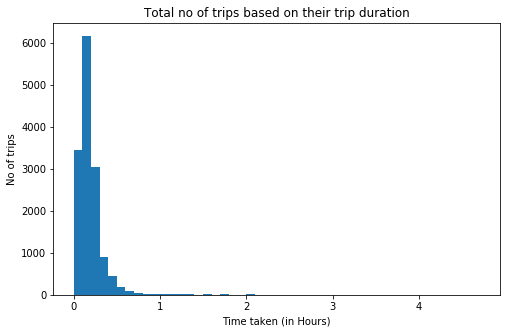

In [28]:
# start with a standard-scaled plot

binsize = .1
bins = np.arange(0, df['duration_hour'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)
plt.xlabel('Time taken (in Hours)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration')
plt.show()

Conclusion<br>
It shows that most of the trip duration takes less than 2 days

Define<br>
<b>Lets zoom on the y-axis to see if there is outlier or the curve is trailing

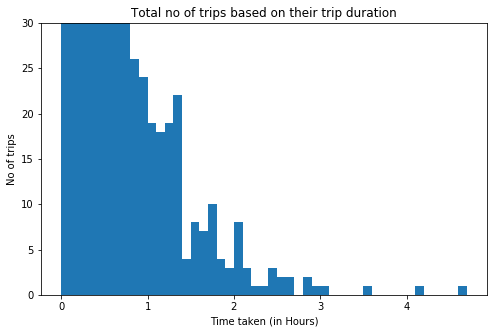

In [29]:
# Zoom on the y-axis to see if there is any outlier or it has continuous values

binsize = .1
bins = np.arange(0, df['duration_hour'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)
plt.ylim(0,30)
plt.xlabel('Time taken (in Hours)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration')
plt.show()

Conclusion<br>
We could see that values are distributed perfectly so we can use log scale.  

Define<br>
<b>Looks like the curve is skewed towards the right. So lets plot the graph on the log scale on the x-axis

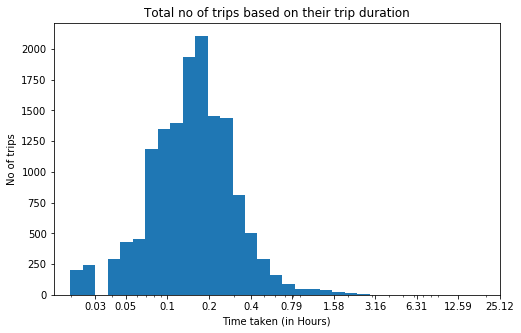

In [30]:
# there's a long tail in the distribution, so let's put it on a log scale instead

binsize = .1
log_binsize = 0.09
bins = 10 ** np.arange(-1.7, np.log10(df['duration_hour'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)

plt.xscale('log')
bins = np.around(10 ** np.arange(-1.6, 1.5, .3), 2)
plt.xticks(bins, bins)
plt.xlabel('Time taken (in Hours)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration')
plt.show()

Conclusion<br>
It's a normal curve but skewed slightly to the right.

 <b>Most common/popular starting stations

In [31]:
df['end_station_name'].value_counts()[-10:]

Sonora Ave at 1st St         1
George St at 1st St          1
Egbert Ave at Jennings St    1
Gish Rd at 1st St            1
Divisadero St at Clay St     1
1st St at Younger Ave        1
Bird Ave at Willow St        1
17th St at Santa Clara St    1
Willow St at Vine St         1
Mission St at 1st St         1
Name: end_station_name, dtype: int64

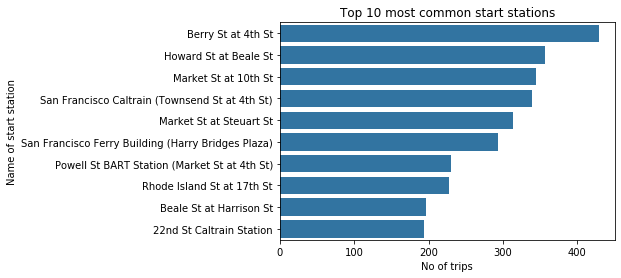

In [32]:
#Graphical representation
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 most common start stations');

Conclusion<br>
With this representation we could see that Berry st at 4th station is the most common start station followed by Howard St at Beale Station.

<b>Least Common/Popular Start Station

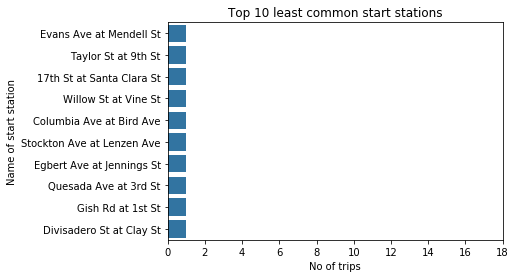

In [33]:
least_counts = df['start_station_name'].value_counts()
least_order = least_counts.index
sb.countplot(data = df, y = 'start_station_name', order = least_order[-10:], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 least common start stations');
x_labels = np.arange(0, 19, 2)
plt.xticks(x_labels, x_labels);

In [34]:
least_counts = df['start_station_name'].value_counts()
least_counts

Berry St at 4th St                                429
Howard St at Beale St                             356
Market St at 10th St                              344
San Francisco Caltrain (Townsend St at 4th St)    339
Market St at Steuart St                           313
                                                 ... 
Stockton Ave at Lenzen Ave                          1
Egbert Ave at Jennings St                           1
Quesada Ave at 3rd St                               1
Gish Rd at 1st St                                   1
Divisadero St at Clay St                            1
Name: start_station_name, Length: 294, dtype: int64

<b>Conclusion<br></b>
With Above representation we could see that we have more than 4 stations name who had less booking count i.e Evans Ave at Mendell,Gidh Rd at 1st etc.

<b> Most common/popular end stations
    

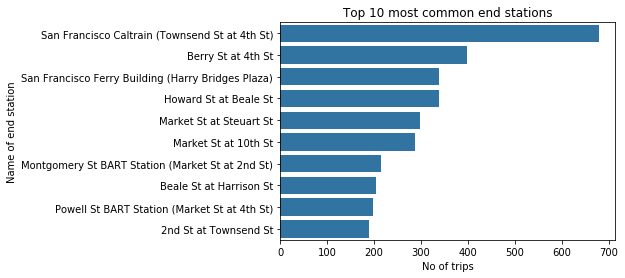

In [35]:
endstation_counts = df['end_station_name'].value_counts()
endstation_order = endstation_counts.index
sb.countplot(data = df, y = 'end_station_name', order = endstation_order[:10], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 most common end stations');

Conclusion<br>
With the above represenation we could see that San Francisco Caltrain(Townsend st at 4th st) is most popular end station.

<b>Let see the distribution of rental access method with user type

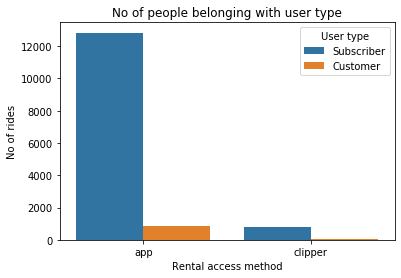

In [36]:
sb.countplot(data=df,x= 'rental_access_method', hue='user_type');
plt.xlabel('Rental access method')
plt.ylabel('No of rides')
plt.title('No of people belonging with user type')
plt.legend(title='User type');

<b>Conclusion</b><br>
With above representation we could see that subscriber has booked more rides compare to customers.

Define<br>
<b>Month Wise rides booking visualization

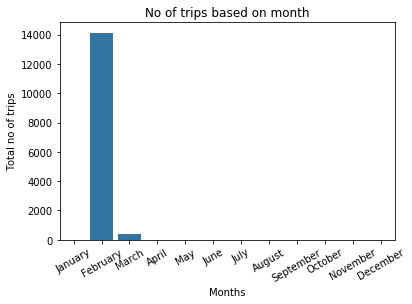

In [37]:
x_marker = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
            'November', 'December']
sb.countplot(data=df, x='start_month', order=x_marker, color=base_color);
plt.xticks(rotation=30)
plt.title('No of trips based on month')
plt.xlabel('Months')
plt.ylabel('Total no of trips');

<b>Conclusion</b><br>
With the above represenation we could see that maximum booking done in Month of February because of vacation Time.

<font size = '3'><b>Variation based on the day of Week

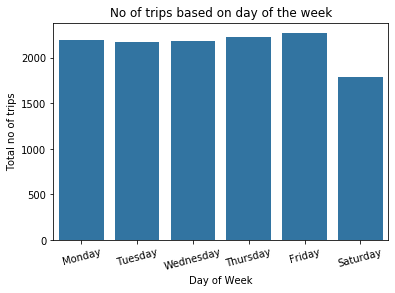

In [38]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='end_day', order=x_marker, color=base_color);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.xticks(rotation=15)
plt.ylabel('Total no of trips');

<b>Conclusion</b><br>
We could see that most of the rides ended on Friday and least at Saturday 

<b>Participation in Trip based on day of week and rental access method.

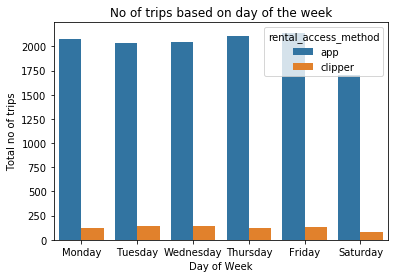

In [39]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', hue='rental_access_method', order=x_marker);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Total no of trips');

<b>Conclusion</b><br>
With help of above representation we could see that app is the most pouplar method to book rides.

Lets see the participation in trips based on day of the week and the type of user subscription

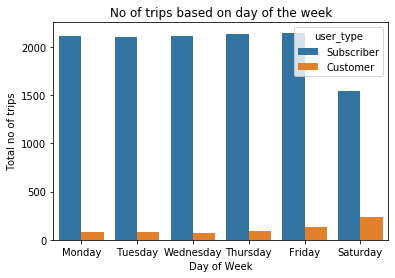

In [40]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', hue='user_type', order=x_marker);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Total no of trips');

<b>Conclusion</b><br>
The above graph shows that most of the people having the trips are subscriber. Also the no of customers for all days are almost same. This concludes that the ratio of customer on Saturday is the highest.

<font size = '3'><b>Look at the Starting time of the Trips

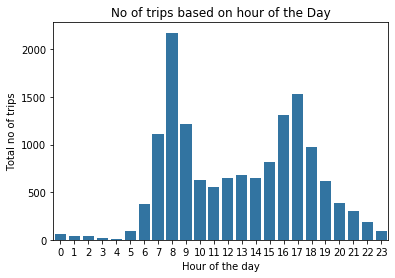

In [41]:
df.groupby('start_hour').count()
sb.countplot(data=df, x='start_hour', color=base_color);
plt.xlabel('Hour of the day')
plt.ylabel('Total no of trips')
plt.title('No of trips based on hour of the Day');

<b>Conclusion</b><br>
With above graph we could see that most of the trips are done in morning timing. In afternoon we couldn't see any hike and before 5 AM there is almost less trips

<b>Ending Time of the Trips

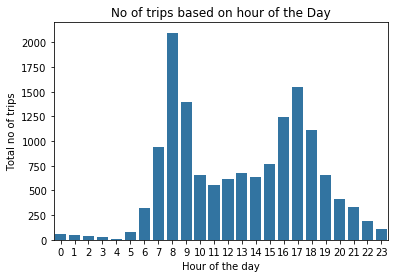

In [42]:
df.groupby('end_hour').count()
sb.countplot(data=df, x='end_hour', color=base_color);
plt.xlabel('Hour of the day')
plt.ylabel('Total no of trips')
plt.title('No of trips based on hour of the Day');

<b>Conclusion</b><br>
The above graph shows that most of the trips are finished either in the morning or in the evening. There is slightly less no of trips finishing during the afternoon. There is almost no trips finishing before 5. The graph obtained is a bimodal graph with first peak at 8AM.

<font size='3'><b>Distribution of Longitude and latitude of various trips done

In [43]:
df[['latitude_diff', 'longitude_diff']].describe()

,latitude_diff,longitude_diff
count,14515.000000,14515.000000
mean,-0.000696,-0.000774
std,0.014975,0.016200
min,-0.069122,-0.079452
25%,-0.010151,-0.008859
50%,0.000000,0.000000
75%,0.009329,0.007688
max,0.072921,0.084897


With help of above data we could see that 50% value of both columns are 0 which clears net travel done is zero

<font size='3'><b>Most popular bike models which were used for the trips.

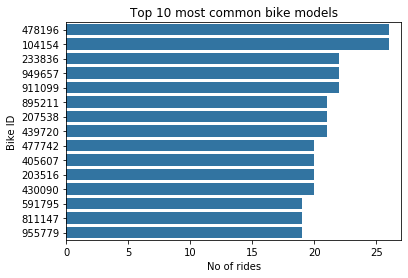

In [44]:
neighbourhood_counts = df['bike_id'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.xlim(0,df['bike_id'].value_counts().max() + 1)
sb.countplot(data = df, y = 'bike_id', order = neighbourhood_order[0:15], color=base_color)
plt.xlabel('No of rides')
plt.ylabel('Bike ID')
plt.title('Top 10 most common bike models');

<b>Conclusion</b><br>
We could see that bike id (478196 and 104154) are most booked bikes more than 20 rides.

<b>The least popular bike models which were used for the trips

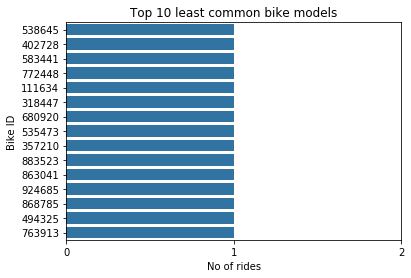

In [45]:
neighbourhood_counts = df['bike_id'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.xlim(0,df['bike_id'].value_counts().min() + 1)
sb.countplot(data = df, y = 'bike_id', order = neighbourhood_order[-15:], color=base_color)
x_labels = [0,1,2]
plt.xticks(x_labels, x_labels)

plt.xlabel('No of rides')
plt.ylabel('Bike ID')
plt.title('Top 10 least common bike models');

<b>Conclusion</b><br>
We could see that we have multiple bikes(538645,402728,583441,772448,111634,318447,680920,535473,357210,883523,863041,924685,868785,493425,763913) which were booked very less.We should do some modification with these bikes such as paint,gear box etc to increase booking rate of these bikes.

# Bivariate Exploration

<b>The difference between latitudes and longitudes once more using jointplots.

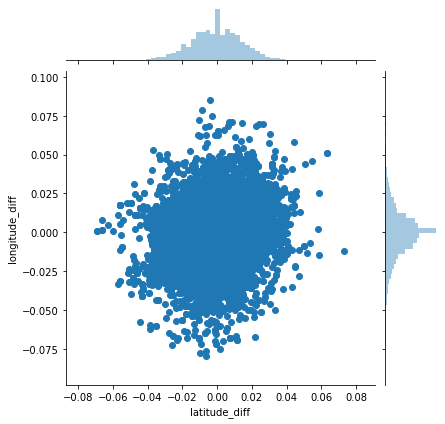

In [46]:
sb.jointplot(data=df, x='latitude_diff', y='longitude_diff');

<b>Conclusion</b><br>
Most of the trips have very less difference in the latitudes and longitudes. The trips having the highest and lowest differences seem to be outliers as they are very few

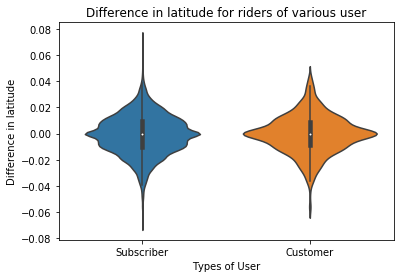

In [47]:
sb.violinplot(data=df, x='user_type', y = 'latitude_diff')
plt.xlabel('Types of User')
plt.ylabel('Difference in latitude')
plt.title('Difference in latitude for riders of various user');

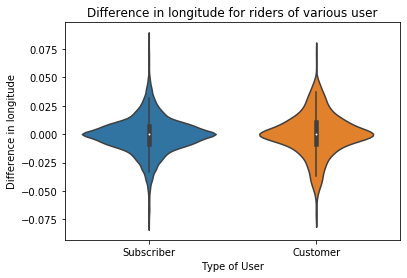

In [48]:
sb.violinplot(data=df, x='user_type', y = 'longitude_diff')
plt.xlabel('Type of User')
plt.ylabel('Difference in longitude')
plt.title('Difference in longitude for riders of various user');

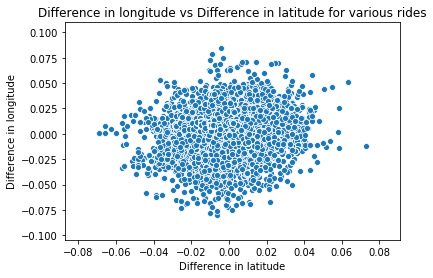

In [49]:
sb.scatterplot(data = df, x='latitude_diff', y='longitude_diff')
plt.xlabel('Difference in latitude')
plt.ylabel('Difference in longitude')
plt.title('Difference in longitude vs Difference in latitude for various rides');

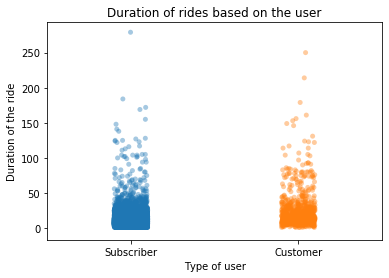

In [50]:
sb.stripplot(data = df, x = 'user_type', y = 'duration_min', alpha = 0.4)
plt.xlabel('Type of user')
plt.ylabel('Duration of the ride')
plt.title('Duration of rides based on the user');

# Multivariate Exploration

In [51]:
numeric_vars = ['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                'end_station_longitude', 'start_hour']
categoric_vars = ['user_type', 'rental_access_method']

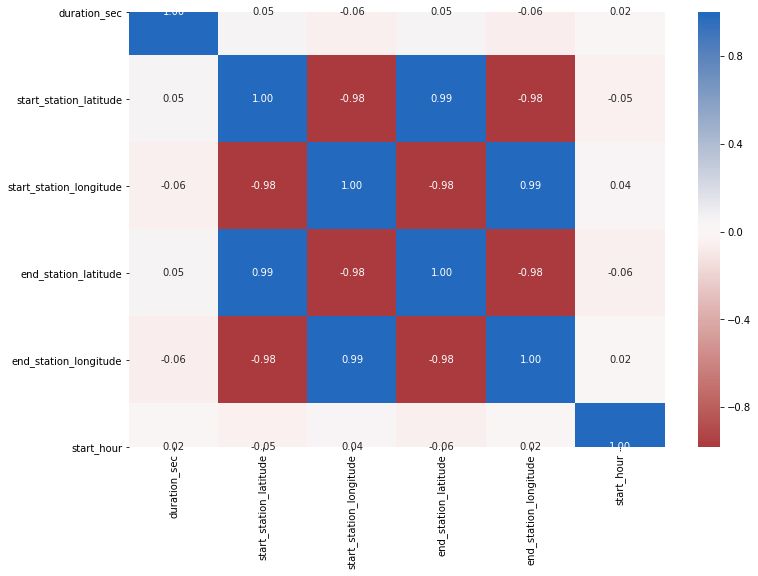

In [52]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)

plt.show()

<b>Conclusion</b><br>
From the above plot we can see that there are few variables which are highly correlated to some other variables either having positive correlation or negative correlation.

<b>Pair wise grid for the above variables

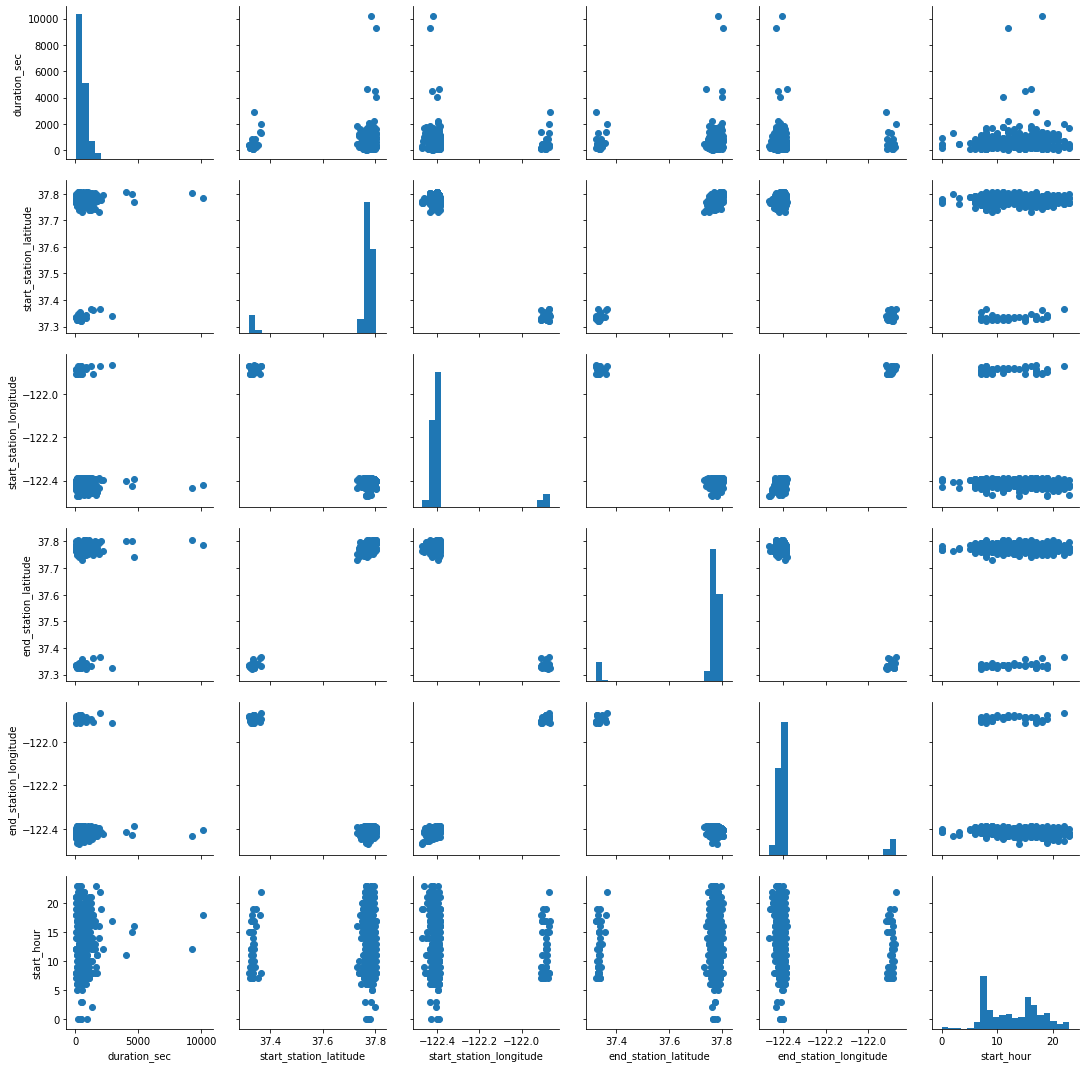

In [53]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
diamonds_samp = df.loc[samples,:]

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

<b>Conclusion</b><br>
We can see that there is no linear dependence among any two variables. Most of them are divided in some segments either vertically or horizontally.

<b>Visualize the above data using Box plots

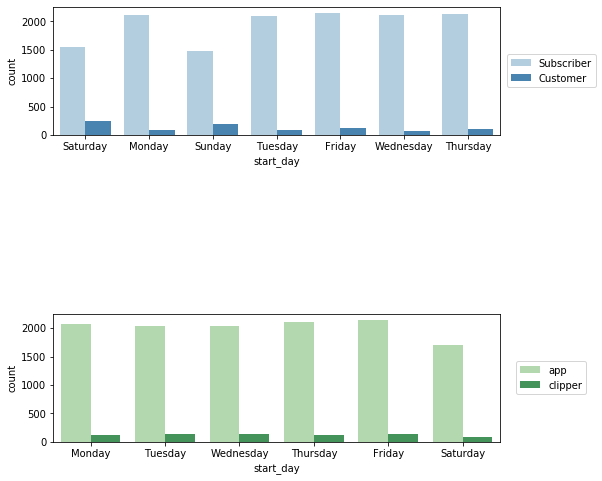

In [54]:
plt.figure(figsize = [8, 8])
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']

# subplot 1: start_day vs user_type
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'start_day', hue = 'user_type', palette = 'Blues')
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5))


# subplot 2: start_day vs. rental_access_method
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'start_day', hue = 'rental_access_method', palette = 'Greens', order = x_marker)
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5)) 

plt.show()

<ul>
<b>Conclusion</b><br>
<li>we see that Subsscriber dominates in the user type.
<li>App dominates in rental access method.


# Final Observations

1.It shows that most of the trip duration takes less than 2 days<br>
2.we could see that Berry st at 4th station is the most common start station followed by Howard St at Beale Station.<br>
3.we could see that San Francisco Caltrain(Townsend st at 4th st) is most popular end station.<br>
4.we could see that subscriber has booked more rides compare to customers<br>
5.we could see that maximum booking done in Month of February because of vacation Time<br>
6.most of the rides ended on Friday and least at Saturday <br>
7.we could see that most of the trips are done in morning timing.<br>
8.In afternoon we couldn't see any hike and before 5 AM there is almost less trips<br>
9.We could see that bike id (478196 and 104154) are most booked bikes more than 20 rides<br>
10.we see that Subsscriber dominates in the user type